# Práctica en clase (Método jerárquico)
Cuando Tesla inició operaciones en Europa, el mercado europeo era muy diferente al norteamericano. Por ello, les interesó conocer cómo se podía segmentar el mercado automotriz. Se recopiló una muestra aleatoria de 15 modelos de automóviles conn las siguientes variables:
- Desplazamiento del motor
- Momento de giro en Nm
- Caballos de fuerza
- Longitud en milímetros
- Ancho en milímetros
- Peso en kilogramos
- Volumen en litros de la cajuela
- Velocidad máxima en kmph
- Aceleración de 0 a 100 km/h en segundos


Realiza los siguientes pasos
1. Carga las librerías y los datos
2. Obtén la estadística descriptica de cada variable
3. Elimina variables altamente correlacionadas (r > 0.90).
4. Estandariza las variables
5. Realiza un análisis de conglomerados mediante el método jerárquico.
6. Ilustra con un dendrograma.

In [15]:
# Con Windows para limitar el uso de núcleos del procesador
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [9]:
pip install matplotlib==3.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 4.5 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_excel('data/b12_autos.xlsx')

In [4]:
# Estadística descriptica 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
desplazamiento,15.0,2000.600000,814.259769,996.0,1364.0,1968.0,2445.0,3498.0
momento,15.0,213.400000,99.300266,90.0,126.5,230.0,310.0,353.0
potencia,15.0,146.733333,80.504185,65.0,87.5,136.0,197.5,301.0
longitud,15.0,4300.533333,440.232871,3535.0,4003.0,4315.0,4684.5,4916.0
ancho,15.0,1759.466667,71.416151,1595.0,1719.0,1769.0,1817.5,1855.0
peso,15.0,1341.333333,240.505024,929.0,1145.0,1340.0,1573.0,1660.0
cajuela,15.0,376.666667,155.211683,127.0,272.5,320.0,530.0,588.0
velocidad,15.0,203.800000,38.174786,154.0,175.5,201.0,238.0,275.0
aceleracion,15.0,10.440000,3.004711,5.4,8.2,10.8,12.3,15.1


In [5]:
# Visualizamos las primeras 5 filas
df.head()

,Name,desplazamiento,momento,potencia,longitud,ancho,peso,cajuela,velocidad,aceleracion
0,Kia Picanto 1.1 Start,1086,97,65,3535,1595,929,127,154,15.1
1,Suzuki Splash 1.0,996,90,65,3715,1680,1050,178,160,14.7
2,Renault Clio 1.2,1149,105,75,3986,1719,1155,288,167,13.4
3,Dacia Sandero 1.6,1598,128,87,4020,1746,1111,320,174,11.5
4,Fiat Grande Punto 1.4,1598,140,88,3986,1719,1215,288,177,11.9


In [6]:
from scipy.stats import pearsonr

In [7]:
# Obtén la matriz de correlaciones
matriz_corr = df.corr(numeric_only = True)

<Axes: >

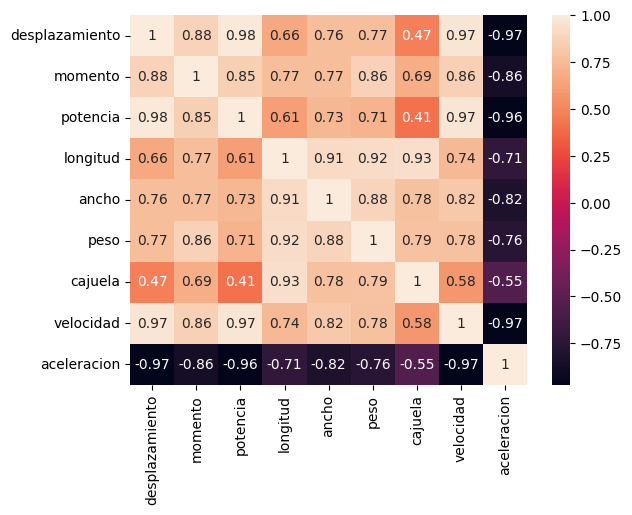

In [8]:
sns.heatmap(matriz_corr, annot = True)

**Selección de variables**: En el análisis de conglomerados, primeramente, se debe decidir qué variables se utilizarán. Es recomendable no utilizar demasiadas variables debido a que se incrementa la complejidad en la identificación de los grupos. Es recomendable además que no estén altamente correlacionadas (p. ej. un coeficiente de correlación mayor a 0.90). En caso de que se tengan muchas variables correlacionadas entre sí, se puede realizar previamente un análisis factorial y utilizar los puntajes factoriales para el análisis de conglomerados.

Para este ejemplo, debido a que la variable “Aporte calórico” y “Porcentaje de alcohol” tienen un coeficiente de correlación de 0.909, de ambas se utilizará solamente “Aporte calórico”. Adicionalmente se considerará la variable de “Costo”. 

In [10]:
X = df[['desplazamiento','velocidad','longitud', 'cajuela', 'peso','ancho', 'momento']]

**Estandarizar variables**: Es importante que las variables puedan ser comparables, por lo tanto, se recomienda estandarizar las variables. *StandarScaler* transforma la variable a una distribución con media cero y desviación estándar igual a uno.

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Seleccionar método**. Aplicaremos la función *linkage** de la biblioteca *scipy*. Se pueden definir varios parámetros, es decir, valores que controlan el comportamiento del algoritmo:
1. *metric*: entre las principales medidas están
    - *euclidean*: es la predeterminada y la más común. Corresponde a la raíz cuadrada de la suma de las diferencias al cuadrado de los valores de las variables.
    - *cityblock*: Utiliza la suma de los valores absolutos de las diferencias de los valores de las variables.

2. *linkage*: es el método que se utilizará para determinar la similitud entre pares de objetos. Entre otros están:
    - *ward*: fusiona aquellos dos grupos que menos incrementen la suma de los cuadrados de las desviaciones.
    - *average*: es el promedio de las distancias entre todos los pares de ambos grupos
    - *complete*: utiliza las distancias máximas entre cualquier par de elementos en dos grupos
    - *single*: utiliza la distancia entre las observaciones más cercanas entre cualquier par de elementos en dos grupos.
  
Si se desea obtener conglomerados (*clusters*) de tamaños similares y no existen valores atípicos, se recomienda utilizar el método de Ward.

In [12]:
Z = linkage(X_std, method='ward', metric='euclidean')

Para visualizar el dendrograma, utilizamos la función  `dendrogram()` junto con `pyplot`

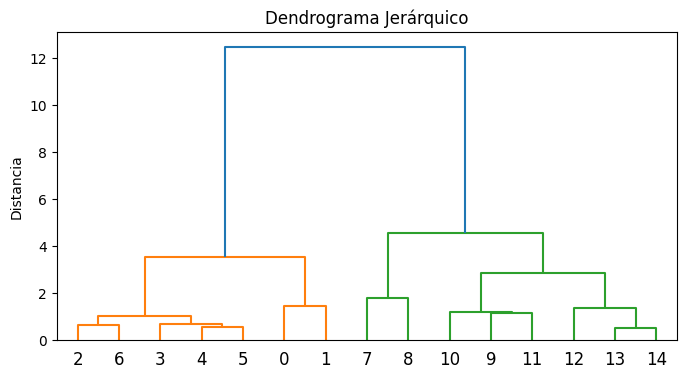

In [13]:
plt.figure(figsize=(8, 4))
plt.title('Dendrograma Jerárquico')
plt.ylabel('Distancia')
dendrogram(Z)
plt.show()